In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving asriosgu_fetal2020.csv to asriosgu_fetal2020.csv


In [ ]:
import io
tabla = pd.read_csv(io.BytesIO(uploaded['asriosgu_fetal2020.csv']), sep = ",", index_col=0, encoding='latin-1')
# tabla = pd.read_csv(io.BytesIO(uploaded['natalidad.csv']), sep = ";", index_col=0, encoding='latin-1')
tabla.head(4)

<ipython-input-3-25c314eaf7dc>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  tabla = pd.read_csv(io.BytesIO(uploaded['asriosgu_fetal2020.csv']), sep = ",", index_col=0, encoding='latin-1')


,COD_MUNIC,A_DEFUN,SIT_DEFUN,OTRSITIODE,TIPO_DEFUN,ANO,MES,HORA,MINUTOS,SEXO,...,C_MUERTEB,C_MUERTEC,C_MUERTED,C_MUERTEE,ASIS_MED,CAUSA_MULT,C_BAS1,CAUSA_667,IDPROFCER,CAU_HOMOL
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
70,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,1,...,1.0,NaN,NaN,NaN,1,P059/P011,P011,402,1,80
11,1,1,1,NaN,1,2020,5,0,0,3,...,1.0,NaN,NaN,NaN,1,P018,P018,402,1,80


In [ ]:
df = tabla[["SEXO", "P_PMAN_IRIS", "PESO_NAC", "T_GES"]]
df["P_PMAN_IRIS"] = df.P_PMAN_IRIS.astype(str)
df.head(4)

<ipython-input-5-34b7e6819ba8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["P_PMAN_IRIS"] = df.P_PMAN_IRIS.astype(str)


,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES
COD_DPTO,,,,
70,3,nan,9,1
11,3,0.0,1,1
11,1,0.0,1,2
11,3,nan,1,1


In [ ]:
df.loc[(df.P_PMAN_IRIS == "nan"), 'P_PMAN_IRIS'] = "6"
df.head(2)

,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES
COD_DPTO,,,,
70,3,6,9,1
11,3,0.0,1,1


In [ ]:

# from sklearn.impute import SimpleImputer
# simple = SimpleImputer(strategy='most_frequent')
# df = simple.fit_transform(df)
df = pd.DataFrame(df, columns = ["SEXO", "P_PMAN_IRIS", "PESO_NAC", "T_GES", "ASIS_MED"])
df.head(4)


,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES,ASIS_MED
COD_DPTO,,,,,
70,3,6,9,1,NaN
11,3,0.0,1,1,NaN
11,1,0.0,1,2,NaN
11,3,6,1,1,NaN


In [ ]:
# df["SEXO"] = df.SEXO.astype(str)
# df["P_PMAN_IRIS"] = df.P_PMAN_IRIS.astype(str)
# df["PESO_NAC"] = df.PESO_NAC.astype(str)
# df["T_GES"] = df.T_GES.astype(str)
df["ASIS_MED"] = df.ASIS_MED.astype(str)
df.head(4)

,SEXO,P_PMAN_IRIS,PESO_NAC,T_GES,ASIS_MED
COD_DPTO,,,,,
70,3,6,9,1,nan
11,3,0.0,1,1,nan
11,1,0.0,1,2,nan
11,3,6,1,1,nan


In [ ]:
# df.loc[(df.SEXO == "3.0"), 'SEXO'] = "Indeterminado"
# df.loc[(df.SEXO == "1.0"), 'SEXO'] = "Masculino"
# df.loc[(df.SEXO == "2.0"), 'SEXO'] = "Femenino"
df.loc[(df.ASIS_MED == "3"), 'ASIS_MED'] = "Ignorado"
df.loc[(df.ASIS_MED == "1"), 'ASIS_MED'] = "Si"
df.loc[(df.ASIS_MED == "2"), 'ASIS_MED'] = "No"
print(df)

          SEXO P_PMAN_IRIS  PESO_NAC  T_GES ASIS_MED
COD_DPTO                                            
70           3           6         9      1      nan
11           3         0.0         1      1      nan
11           1         0.0         1      2      nan
11           3           6         1      1      nan
11           2           6         3      3      nan
...        ...         ...       ...    ...      ...
41           3           6         1      1      nan
11           3           6         9      1      nan
11           3         0.0         9      1      nan
76           3           6         1      1      nan
11           3         0.0         1      1      nan

[33327 rows x 5 columns]


In [ ]:
x = df.drop("PESO_NAC", axis=1)
y = df["PESO_NAC"]
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.3)
trainX

,SEXO,P_PMAN_IRIS,T_GES,ASIS_MED
COD_DPTO,,,,
66,3,6,1,nan
54,3,6,1,nan
76,3,6,1,nan
47,3,6,1,nan
54,1,0.0,3,nan
...,...,...,...,...
68,3,6,1,nan
70,3,0.0,1,nan
70,3,6,1,nan


In [ ]:
df_dummies = pd.get_dummies(df[['SEXO', 'P_PMAN_IRIS', 'T_GES']], drop_first=True)
X = df_dummies
Y = df['PESO_NAC']
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.3, random_state=42)
trainX.head()

,SEXO,T_GES,P_PMAN_IRIS_1.0,P_PMAN_IRIS_2.0,P_PMAN_IRIS_3.0,P_PMAN_IRIS_5.0,P_PMAN_IRIS_6,P_PMAN_IRIS_6.0
COD_DPTO,,,,,,,,
50,1,9,0,0,0,0,0,0
68,1,2,0,0,0,0,1,0
81,1,1,0,0,0,0,1,0
5,2,3,0,0,0,0,1,0
76,3,1,0,0,0,0,0,0


In [28]:

# Configuración aleatoria del número de capas y nodos ocultos
hidden_layer_size = np.random.randint(3, 25)
hidden_layers = np.random.randint(3, 25)

# Crear una instancia de MLPClassifier con los parámetros especificados
mlp_clf = MLPClassifier(
    hidden_layer_sizes=tuple([hidden_layer_size] * hidden_layers),  # Capas ocultas con el mismo número de nodos
    max_iter=500,
    activation='relu',
    solver='adam',
    random_state=42
)

# Entrenar la red neuronal con el conjunto de entrenamiento
mlp_clf.fit(trainX, trainY)


MLPClassifier(hidden_layer_sizes=(14, 14, 14, 14, 14, 14), max_iter=500,
              random_state=42)

In [25]:
y_pred = mlp_clf.predict(testX)
print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))

Accuracy: 0.75


In [31]:
no_obs = np.array([[1.0, 1.0, 1.0, 4.0, 0.0, 1.0, 0.0, 1.0]])
mlp_clf.predict(no_obs)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array([1])

In [32]:
from sklearn.metrics import confusion_matrix
import pylab as pl
cm = confusion_matrix(testY, y_pred)

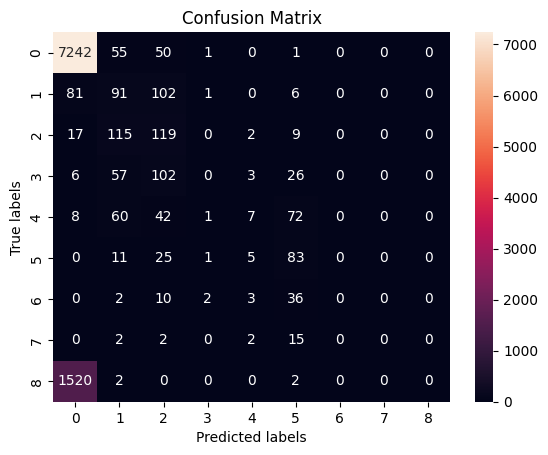

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');


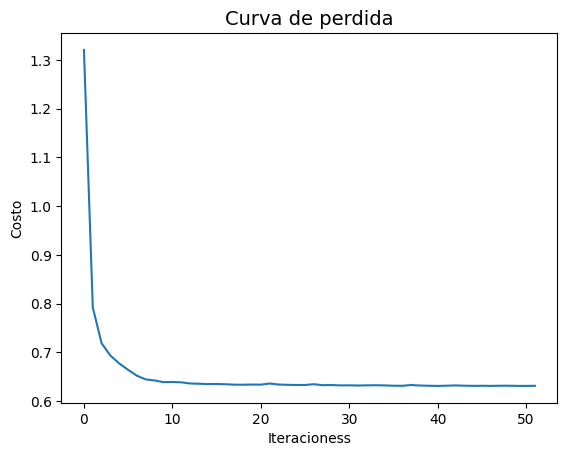

In [34]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Curva de perdida", fontsize=14)
plt.xlabel('Iteracioness')
plt.ylabel('Costo')
plt.show()

In [35]:
#doble capa
# Configuración aleatoria del número de capas y nodos ocultos
hidden_layer_size = np.random.randint(3, 25)
hidden_layers = np.random.randint(3, 25)

# Crear una instancia de MLPClassifier con los parámetros especificados
mlp_clf = MLPClassifier(
    hidden_layer_sizes=tuple([2*hidden_layer_size] * hidden_layers),  # Capas ocultas con el mismo número de nodos
    max_iter=500,
    activation='relu',
    solver='adam',
    random_state=42
)

# Entrenar la red neuronal con el conjunto de entrenamiento
mlp_clf.fit(trainX, trainY)


MLPClassifier(hidden_layer_sizes=(28, 28, 28, 28), max_iter=500,
              random_state=42)

In [36]:
y_pred = mlp_clf.predict(testX)
print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred))) #parece ser que la precisión es igual

Accuracy: 0.75


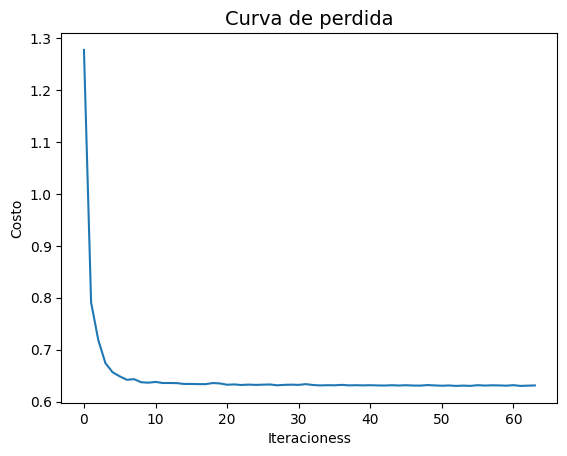

In [37]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Curva de perdida", fontsize=14)
plt.xlabel('Iteracioness')
plt.ylabel('Costo')
plt.show()